In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import preprocessing

In [80]:
dataset = pd.read_csv("Topic_Survey_Assignment.csv")



dataset.rename( columns={'Unnamed: 0':'name of subject'}, inplace=True)
column = ['name of subject','Very interested', 'Somewhat interested', 'Not interested']

dataset.head()

,name of subject,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [76]:

le = preprocessing.LabelEncoder()
unname_list = []

for item in dataset.iloc[:,0]:
    unname_list.append(item)
    
unname_list = list(set(unname_list))
unname_list

le.fit(unname_list)

encoder_list = le.transform(unname_list)

encoder_list

#write to dataframe
dataset.iloc[:,0] = encoder_list
dataset.head()

,name of subject,Very interested,Somewhat interested,Not interested
0,5,1332,729,127
1,1,1688,444,60
2,3,429,1081,610
3,2,1340,734,102
4,0,1263,770,136


In [57]:

data = []


def add_to_dict(category):
    temp_list = {}
    count = 0
    for item in dataset[category]:
        temp_list[count] = item

        count+=1

    return temp_list

col_very_interested = add_to_dict(column[1])
data.append(col_very_interested)

col_somewhat_interested = add_to_dict(column[2])
data.append(col_somewhat_interested)

col_not_interested = add_to_dict(column[3])
data.append(col_not_interested)




data


[{0: 1332, 1: 1688, 2: 429, 3: 1340, 4: 1263, 5: 1629},
 {0: 729, 1: 444, 2: 1081, 3: 734, 4: 770, 5: 477},
 {0: 127, 1: 60, 2: 610, 3: 102, 4: 136, 5: 74}]

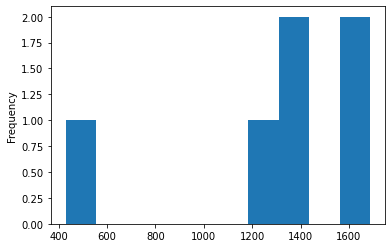

In [77]:

def add_to_list(category):
    temp_list = [] 
    for item in dataset[category]:
        temp_list.append(item)
        
    return temp_list
        
list_very_interested = add_to_list(column[1])
list_somewhat_interested = add_to_list(column[2])
list_not_interested = add_to_list(column[3])

dataset[column[1]].plot(kind='hist')

In [81]:
df = pd.DataFrame(dataset, columns=column)

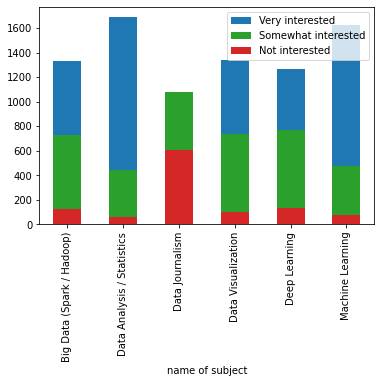

In [83]:
ax = df.plot(x=column[0], y=column[1], kind="bar")
df.plot(x=column[0], y=column[2], kind="bar", ax=ax, color="C2")
df.plot(x=column[0], y=column[3], kind="bar", ax=ax, color="C3")
plt.show()


In [85]:
#dataset = pd.read_csv("Topic_Survey_Assignment.csv", index_col=column[0])
column[0]

'name of subject'

# problem number 1

In [90]:
df = pd.DataFrame(dataset, columns=column)
df

,name of subject,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


# Problem 2

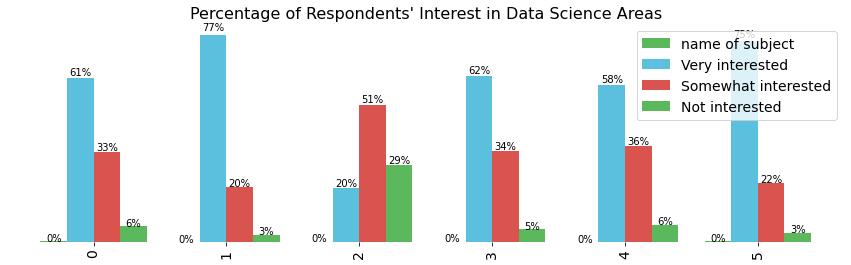

In [94]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

df.iloc[:,0] = encoder_list

# Normalize result
result_pct = df.div(dataset.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
